In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = []
labels = []
classes = 43
cur_path = '/home/Downloads/archive'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print( X_test.shape)
print(y_train.shape)
print( y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367,)
(7842,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]),
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(43, activation='softmax')])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 73s 74ms/step - loss: 2.4475 - accuracy: 0.3655 - val_loss: 1.0222 - val_accuracy: 0.7081
Epoch 2/10
981/981 [==============================] - 84s 85ms/step - loss: 1.0132 - accuracy: 0.6983 - val_loss: 0.3819 - val_accuracy: 0.9058
Epoch 3/10
981/981 [==============================] - 85s 87ms/step - loss: 0.6413 - accuracy: 0.8110 - val_loss: 0.2273 - val_accuracy: 0.9411
Epoch 4/10
981/981 [==============================] - 83s 85ms/step - loss: 0.4903 - accuracy: 0.8563 - val_loss: 0.2198 - val_accuracy: 0.9388
Epoch 5/10
981/981 [==============================] - 58s 59ms/step - loss: 0.4130 - accuracy: 0.8794 - val_loss: 0.1351 - val_accuracy: 0.9649
Epoch 6/10
981/981 [==============================] - 47s 48ms/step - loss: 0.3761 - accuracy: 0.8935 - val_loss: 0.1211 - val_accuracy: 0.9665
Epoch 7/10
981/981 [==============================] - 50s 51ms/step - loss: 0.3315 - accuracy: 0.9073 - val_loss: 0.0863 - val_accuracy:

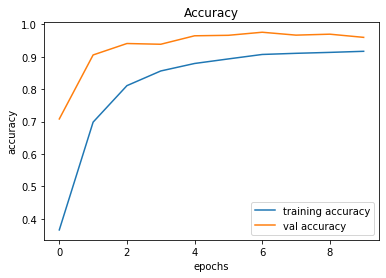

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



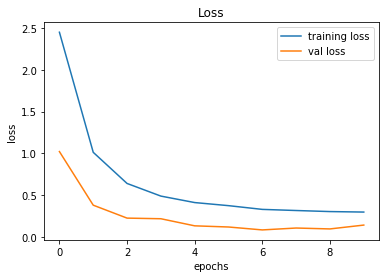

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/home/Downloads/archive/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
p='/home/Downloads/archive/'
for img in imgs:
    img=os.path.join(p,img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

/home/rishabh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
0.9201900237529691
